In [1]:
# RODOR algorithm for coin counting, tag image example
# Based on paper RODOR algorithm for the identification of irregular surfaces with circular 
# contours applied to the recognition and counting of coins
# Paper and code by Msc Evelyn Orellana and Msc Edgar Rodriguez. 2023
# Paper on https://www.revistatoolbar.com/
# Email :    eorellana@revistatoolbar.com,     erodriguez@revistatoolbar.com
#
# This project is licensed under the terms of the MIT License

from RCC_Modules import *

In [2]:
def RCCtagCoinImage(  ImageFile, ObjCoinImages ):
    ImgPostfix = '-Tagged'
    with open( OutputDir + ImageFile + ObjCoinImages, 'rb') as fileobj:
        CoinImages = pickle.load(fileobj)

    ImgOriColor, ImageGray = fnReadImage( InputDir + 'TestImg/', ImageFile )  
    ImgTagColor = ImgOriColor.copy()

    for ci in CoinImages:
        AvgAccuracy, Diameter, xLTC, yLTC, Country, Currency, CurrencyValue, eTime = ci  # x, y in Left top corner ( LTC ) of image
        Radio = int((Diameter + 0.99)/2)

        cv.circle(ImgTagColor,(xLTC+Radio-2,yLTC+Radio-2),Radio,(pxBlack,pxBlack,pxBlack),2)
        cv.putText(ImgTagColor,str(Country)+'-'+str(Currency), fnTagPosXY(Radio,xLTC,yLTC,'Top'), cv.FONT_HERSHEY_PLAIN,1, [pxWhite,pxBlack,pxBlack], 2) # BGR color 
        cv.putText(ImgTagColor,str(CurrencyValue), fnTagPosXY(Radio,xLTC,yLTC,'Middle'), cv.FONT_HERSHEY_PLAIN,1, [pxWhite,pxBlack,pxBlack], 2)
        cv.putText(ImgTagColor,str(int(AvgAccuracy)) + '%', fnTagPosXY(Radio,xLTC,yLTC,'BottonLeft'), cv.FONT_HERSHEY_PLAIN,1, [pxWhite,pxBlack,pxBlack], 2)
        cv.putText(ImgTagColor,str(eTime), fnTagPosXY(Radio,xLTC,yLTC,'BottonRight'), cv.FONT_HERSHEY_PLAIN,1, [pxWhite,pxBlack,pxBlack], 2)
        
    fnShowImage( [cv.cvtColor(ImgOriColor, cv.COLOR_RGB2BGR),None,None], ['Original image file','',''], (40,40), [131,132,133] )
    fnShowImage( [cv.cvtColor(ImgTagColor, cv.COLOR_RGB2BGR),None,None], ['Tagged image file','',''], (40,40), [131,132,133] )
    fnSaveImagen( OutputDir, ImageFile, ImgPostfix, ImgTagColor)

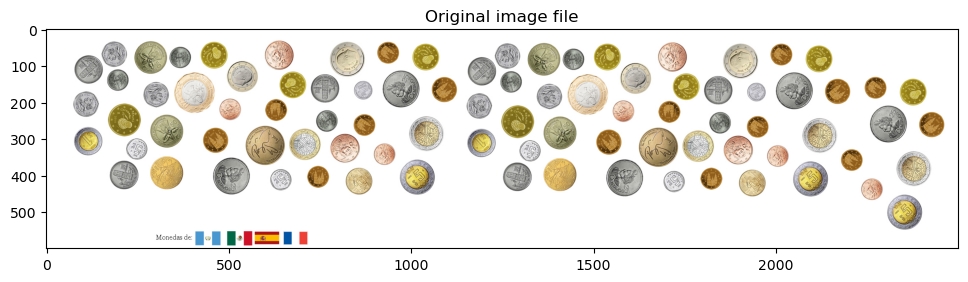

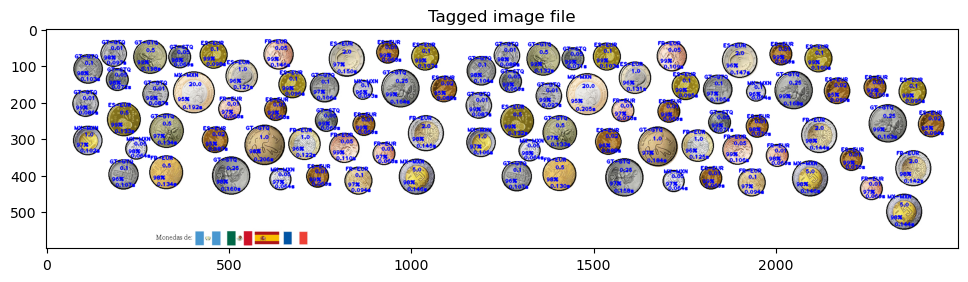

In [3]:
RCCtagCoinImage( ImageFile='CoinsALL-dp2', ObjCoinImages = '_obj.pickle' )